In [12]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy
from math import exp
%matplotlib inline

In [181]:
data=pd.DataFrame(np.random.randint(70,90,500),columns=['value'])
data.head(10)

,value
0,74
1,76
2,83
3,81
4,86
5,81
6,72
7,88
8,74
9,88


In [182]:
data['value'].value_counts()
mean=np.mean(data['value'])
std=np.std(data['value'])
mean,std

(78.958, 5.62105292627636)

In [183]:
s=data['value'].value_counts().sort_index()
s

70    20
71    28
72    31
73    29
74    32
75    30
76    28
77    22
78    20
79    28
80    37
81    18
82    20
83    25
84    25
85    24
86    21
87    25
88    17
89    20
Name: value, dtype: int64

In [184]:
S=pd.DataFrame({'血糖':s.index,'频数':s.values})
S

,血糖,频数
0,70,20
1,71,28
2,72,31
3,73,29
4,74,32
5,75,30
6,76,28
7,77,22
8,78,20
9,79,28


In [185]:
sys.path.append('/Users/hurrywish/Downloads/Data_analysis_package/')
from normal_distribution_integration import normal_distribution_integration

In [186]:
normal_distribution_integration(1)

0.8413447460685435

In [187]:
S['累计频数']=S['频数'].cumsum()
S['累计频率']=S['累计频数']/S['频数'].sum()
S['标准化']=(S['血糖']-mean)/std
S['校验值']=S['标准化'].apply(lambda x:normal_distribution_integration(x))

In [188]:
d_max=abs(S['累计频率']-S['校验值']).max()
d_max

0.09932674940628924

In [189]:
S

,血糖,频数,累计频数,累计频率,标准化,校验值
0,70,20,20,0.040,-1.593652,0.055507
1,71,28,48,0.096,-1.415749,0.078425
2,72,31,79,0.158,-1.237846,0.107887
3,73,29,108,0.216,-1.059944,0.144585
4,74,32,140,0.280,-0.882041,0.188877
5,75,30,170,0.340,-0.704139,0.240673
6,76,28,198,0.396,-0.526236,0.299362
7,77,22,220,0.440,-0.348333,0.363795
8,78,20,240,0.480,-0.170431,0.432336
9,79,28,268,0.536,0.007472,0.502981


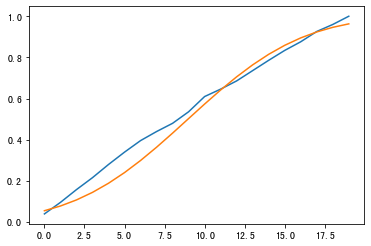

In [190]:
S['累计频率'].plot()
S['校验值'].plot()

In [191]:
1.63/np.sqrt(S['频数'].sum())

0.07289581606649313

In [192]:
0.87/np.sqrt(S['频数'].sum())

0.038907582808496335

In [193]:
from scipy import stats

In [194]:
stats.kstest(data['value'],'norm',(mean,std))

KstestResult(statistic=0.09932674940628933, pvalue=9.549843873180558e-05)